In [45]:
### [Data Sprint #35: Osteoarthritis Knee X-ray](https://dphi.tech/challenges/data-sprint-35-osteoarthritis-knee-x-ray/81/leaderboard/datathon/)

In [46]:
pip freeze

absl-py==0.15.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/w

In [85]:
cd D:\MDL\model

D:\MDL\model


In [86]:
ls

 D 드라이브의 볼륨: D
 볼륨 일련 번호: 8A38-AFB7

 D:\MDL\model 디렉터리

2021-11-11  오후 04:41    <DIR>          .
2021-11-11  오후 04:41    <DIR>          ..
2021-11-03  오후 04:23       169,369,240 97.70-knee_xray_Xceptionnet_GPA.h5
2021-11-03  오후 04:22       506,661,429 97.70-xception_best.ckpt.data-00000-of-00001
2021-11-03  오후 04:22            43,431 97.70-xception_best.ckpt.index
2021-11-06  오후 06:58       190,388,144 98.11-knee_xray_Xceptionnet.h5
2021-11-06  오전 09:34       184,400,544 99.08-knee_xray_Xceptionnet.h5
2021-11-03  오후 09:49       169,369,240 99.33-knee_xray_Xceptionnet_GPA.h5
2021-11-03  오후 09:38       506,661,429 99.33-xception_best.ckpt.data-00000-of-00001
2021-11-03  오후 09:38            43,431 99.33-xception_best.ckpt.index
2021-11-06  오후 11:56       157,277,888 99.54-knee_xray_Xceptionnet_GPA.h5
2021-11-06  오후 11:54       470,335,297 99.54-xception_best.ckpt.data-00000-of-00001
2021-11-06  오후 11:54            47,103 99.54-xception_best.ckpt.index
2021-11-11  오후 04:17               1

In [48]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [49]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17144550678636392919
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22727688192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9065180801263438733
physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [50]:
!nvidia-smi

Thu Nov 11 13:11:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.72       Driver Version: 461.72       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P8    27W / 350W |  23769MiB / 24576MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

In [52]:
model_name = Xception
name = 'Xception'
batch_size = 8
train_epoch = 300
val_epoch = 50
seed = 42
image_size = 224
LP = 99
lr = 0.00001
decay = 0.0001

# 학습 데이터 세트

In [122]:
# number of class
n_class = 5

# path to kaggle dataset
root_path = "C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\"

# list of folders
folder_list = os.listdir(root_path)
image_path_list = []
label_list = []

# for each folder, get the image path and labels
for folder in folder_list:
    for label in range(n_class):
        
        # get all the images path inside the current folder
        image_list = os.listdir(f"{root_path}{folder}/{label}")
        # add to the image path list
        image_path_list += [ f"{root_path}{folder}/{label}/"+ path for path in image_list]
        
        # add labels to the label list
        label_list += [label] * len(image_list)

# convert to dataframe
df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})
df_train_kaggle
# type(df_train_kaggle)

,filepath,label
0,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\a...,0
1,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\a...,0
2,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\a...,0
3,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\a...,0
4,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\a...,0
...,...,...
9781,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\v...,4
9782,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\v...,4
9783,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\v...,4
9784,C:\Users\ngkim\Downloads\ClsKLData\kneeKL224\v...,4


In [124]:
image_path_list

['C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9003175_1.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9003175_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9003316_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9003815_1.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9003815_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9004184_1.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9006407_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9009927_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9009957_2.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9010308_1.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9013941_1.png',
 'C:\\Users\\ngkim\\Downloads\\ClsKLData\\kneeKL224\\auto_test/0/9015718_1.png',
 'C:\\Users\\ngkim\\Download

In [157]:
# number of class
n_class = 5

# path to kaggle dataset
test_root_path = "C:\\Users\\ngkim\\Downloads\\224_data\\"

# list of folders
test_folder_list = os.listdir(test_root_path)
test_image_path_list = []
test_label_list = []

# for each folder, get the image path and labels
for folder in test_folder_list:
    for label in range(n_class):
        
        # get all the images path inside the current folder
        test_image_list = os.listdir(f"{test_root_path}{folder}/{label}")
        # add to the image path list
        test_image_path_list += [ f"{test_root_path}{folder}/{label}/"+ path for path in test_image_list]
        
        # add labels to the label list
        test_label_list += [label] * len(test_image_list)

# convert to dataframe
df_test = pd.DataFrame({"filepath" : test_image_path_list, "label": test_label_list})
df_test

,filepath,label
0,C:\Users\ngkim\Downloads\224_data\test/0/5a210...,0
1,C:\Users\ngkim\Downloads\224_data\test/0/5a210...,0
2,C:\Users\ngkim\Downloads\224_data\test/0/5a211...,0
3,C:\Users\ngkim\Downloads\224_data\test/0/5a211...,0
4,C:\Users\ngkim\Downloads\224_data\test/0/5a28d...,0
...,...,...
526,C:\Users\ngkim\Downloads\224_data\test/4/5b0e3...,4
527,C:\Users\ngkim\Downloads\224_data\test/4/5b0f6...,4
528,C:\Users\ngkim\Downloads\224_data\test/4/5b10d...,4
529,C:\Users\ngkim\Downloads\224_data\test/4/5b10d...,4


In [125]:
test_image_path_list

['C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a21060fe4b0f1e9e5622e32.dcm_left.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a21060fe4b0f1e9e5622e32.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a21112ee4b09b69e603db16.dcm_left.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a21112ee4b09b69e603db16.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a28d27ae4b028f6846ae00a.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a377f14e4b06f4ed3b079a1.dcm_left.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a377f14e4b06f4ed3b079a1.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a45d8b7e4b06f4ed3b482be.dcm_left.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a45d8b7e4b06f4ed3b482be.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a46f79ce4b06f4ed3b4b7d3.dcm_left.jpg',
 'C:\\Users\\ngkim\\Downloads\\224_data\\test/0/5a46f79ce4b06f4ed3b4b7d3.dcm_right.jpg',
 'C:\\Users\\ngkim\\Downlo

In [94]:
df_test.shape

(531, 2)

Text(0, 0.5, 'count')

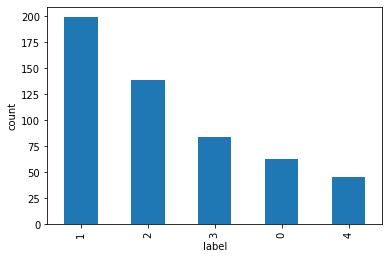

In [95]:
df_test.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [54]:
df_train_kaggle.shape

(9786, 2)

# 샘플 분포

Text(0, 0.5, 'count')

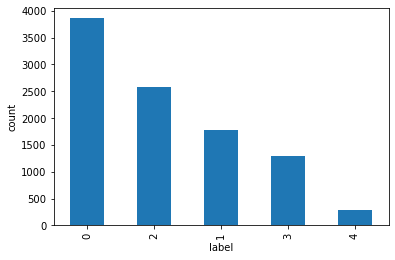

In [55]:
df_train_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [56]:
# train data generator object
train_aug = ImageDataGenerator(
    rescale = 1./255
  )

# validation data generator object
valid_aug = ImageDataGenerator(
    rescale = 1./255
  )

In [118]:
# create train generator
train_generator = train_aug.flow_from_dataframe(
    dataframe = df_train_kaggle,
    directory = None,
    x_col = "filepath",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle = True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 9786 validated image filenames.


In [158]:
# create train generator
test_train_generator = train_aug.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col = "filepath",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle = True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 531 validated image filenames.


# 검증 데이터

In [58]:
# read Train.csv file which contains image names and labels and preprocess them
compi_root_path = "C:\\Users\\ngkim\\Downloads\\KneeXray\\"
df_val_compi = pd.read_csv(compi_root_path + "Train.csv")

# add absolute path to the image names
df_val_compi["filename"] = df_val_compi.filename.apply(lambda x: compi_root_path+"train/" + x)
df_val_compi.head()

,filename,label
0,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
1,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,1
2,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
3,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,1
4,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,2


In [107]:
type(df_val_compi["filename"])

pandas.core.series.Series

In [108]:
df_val_compi.filename.apply(lambda x: compi_root_path+"train/" + x)

0       C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
1       C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
2       C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
3       C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
4       C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
                              ...                        
7823    C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
7824    C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
7825    C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
7826    C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
7827    C:\Users\ngkim\Downloads\KneeXray\train/C:\Use...
Name: filename, Length: 7828, dtype: object

Text(0, 0.5, 'count')

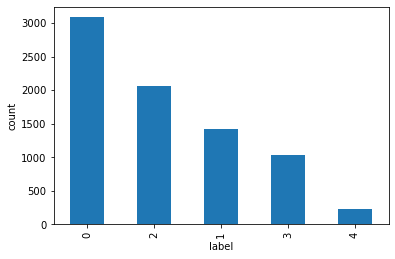

In [59]:
# class count of compitition dataset
df_val_compi.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [60]:
# create validation generator
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe = df_val_compi,
    x_col = "filename",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle= True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 7828 validated image filenames.


In [115]:
# create validation generator
da_test_generator = valid_aug.flow_from_dataframe( 
    dataframe = df_test,
    x_col = "filepath",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle= True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 531 validated image filenames.


# 모델

In [61]:
sel_model = model_name(weights = "imagenet",)
x =  sel_model.layers[-10].output

x = tf.keras.layers.Conv2D(filters = 1536, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 1024, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 768, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 384, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 16, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = n_class, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

GAP = tf.keras.layers.GlobalAveragePooling2D()(x)
pred = tf.keras.activations.softmax(GAP)

pic_model = Model(inputs=sel_model.input,outputs = pred)

In [62]:
pic_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [63]:
# compile
pic_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr, decay = decay),
    metrics = ["acc"],
    loss = tf.keras.losses.sparse_categorical_crossentropy)

# callbacks and checkpoints
checkpoint_name = name+"_BS"+str(batch_size)+"_EP"+str(train_epoch)+"_IS"+str(image_size)+"_LP"+str(LP)
checkpoint_path = checkpoint_name+".ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)

my_callbacks = [
              ModelCheckpoint(
                   checkpoint_path,
                   monitor = 'val_acc',
                   verbose = 1,
                   save_weights_only = True,
                   save_best_only = True,
                   mode = "max"
                  ),
              EarlyStopping(
                   monitor = 'val_loss',
                   patience = 10,
                   verbose = 0
                  ),
              ReduceLROnPlateau(
                   monitor = 'val_loss',
                   patience = 10,
                   verbose = 1
                  )
]

# Weighting classes


In [64]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes = np.unique(df_train_kaggle.label.values),
    y = df_train_kaggle.label.values
  )

class_weights = dict(enumerate(class_weights))

In [65]:
count0, count1, count2, count3, count4 = 0, 0, 0, 0, 0

for i in range(len(df_train_kaggle.label.values)):
    if df_train_kaggle.label.values[i] == 0:
        count0 +=1
    elif df_train_kaggle.label.values[i] == 1:
        count1 +=1
    elif df_train_kaggle.label.values[i] == 2:
        count2 +=1
    elif df_train_kaggle.label.values[i] == 3:
        count3 +=1
    elif df_train_kaggle.label.values[i] == 4:
        count4 +=1
        
print("Grade 0, number of samples :", count0, ", number of weights : ", class_weights[0])
print("Grade 1, number of samples :", count1, ", number of weights : ", class_weights[1])
print("Grade 2, number of samples :", count2, ", number of weights : ", class_weights[2])
print("Grade 3, number of samples :", count3, ", number of weights : ", class_weights[3])
print("Grade 4, number of samples :", count4, ", number of weights : ", class_weights[4])

Grade 0, number of samples : 3857 , number of weights :  0.5074410163339383
Grade 1, number of samples : 1770 , number of weights :  1.1057627118644069
Grade 2, number of samples : 2578 , number of weights :  0.7591931730023274
Grade 3, number of samples : 1286 , number of weights :  1.5219284603421461
Grade 4, number of samples : 295 , number of weights :  6.63457627118644


# Train

In [66]:
# train the model
pic_model.fit(
        train_generator,
        epochs = train_epoch,
        validation_data = valid_generator,
        callbacks = [my_callbacks],
        class_weight = class_weights
      )

# load best saved weights
pic_model.load_weights(checkpoint_path)

Epoch 1/300
1224/1224 [==============================] - 127s 102ms/step - loss: 1.5123 - acc: 0.2824 - val_loss: 1.4611 - val_acc: 0.4734

Epoch 00001: val_acc improved from -inf to 0.47343, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epoch 2/300
1224/1224 [==============================] - 122s 100ms/step - loss: 1.2765 - acc: 0.4549 - val_loss: 1.3316 - val_acc: 0.5487

Epoch 00002: val_acc improved from 0.47343 to 0.54867, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epoch 3/300
1224/1224 [==============================] - 122s 100ms/step - loss: 1.1665 - acc: 0.5282 - val_loss: 1.1908 - val_acc: 0.6180

Epoch 00003: val_acc improved from 0.54867 to 0.61804, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epoch 4/300
1224/1224 [==============================] - 122s 99ms/step - loss: 1.0790 - acc: 0.5687 - val_loss: 1.0974 - val_acc: 0.6575

Epoch 00004: val_acc improved from 0.61804 to 0.65751, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epoch 5/300
1224/122

1224/1224 [==============================] - 122s 100ms/step - loss: 0.5319 - acc: 0.9876 - val_loss: 0.4869 - val_acc: 0.9912

Epoch 00039: val_acc did not improve from 0.99272
Epoch 40/300
1224/1224 [==============================] - 122s 100ms/step - loss: 0.5262 - acc: 0.9907 - val_loss: 0.4842 - val_acc: 0.9897

Epoch 00040: val_acc did not improve from 0.99272
Epoch 41/300
1224/1224 [==============================] - 122s 100ms/step - loss: 0.5319 - acc: 0.9878 - val_loss: 0.4921 - val_acc: 0.9866

Epoch 00041: val_acc did not improve from 0.99272
Epoch 42/300
1224/1224 [==============================] - 122s 99ms/step - loss: 0.5288 - acc: 0.9909 - val_loss: 0.4696 - val_acc: 0.9905

Epoch 00042: val_acc did not improve from 0.99272
Epoch 43/300
1224/1224 [==============================] - 122s 100ms/step - loss: 0.5246 - acc: 0.9899 - val_loss: 0.4741 - val_acc: 0.9932

Epoch 00043: val_acc improved from 0.99272 to 0.99323, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epo

1224/1224 [==============================] - 122s 100ms/step - loss: 0.4816 - acc: 0.9981 - val_loss: 0.4101 - val_acc: 0.9937

Epoch 00081: val_acc did not improve from 0.99591
Epoch 82/300
1224/1224 [==============================] - 123s 100ms/step - loss: 0.4869 - acc: 0.9984 - val_loss: 0.4179 - val_acc: 0.9931

Epoch 00082: val_acc did not improve from 0.99591
Epoch 83/300
1224/1224 [==============================] - 123s 100ms/step - loss: 0.4808 - acc: 0.9969 - val_loss: 0.4156 - val_acc: 0.9922

Epoch 00083: val_acc did not improve from 0.99591
Epoch 84/300
1224/1224 [==============================] - 123s 100ms/step - loss: 0.4791 - acc: 0.9981 - val_loss: 0.4201 - val_acc: 0.9934

Epoch 00084: val_acc did not improve from 0.99591
Epoch 85/300
1224/1224 [==============================] - 123s 100ms/step - loss: 0.4793 - acc: 0.9986 - val_loss: 0.4308 - val_acc: 0.9908

Epoch 00085: val_acc did not improve from 0.99591
Epoch 86/300
1224/1224 [==============================] - 

# 훈련된 모델 재교육

In [113]:
df_val_compi

,filename,label
0,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
1,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,1
2,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
3,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,1
4,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,2
...,...,...
7823,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
7824,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,4
7825,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,0
7826,C:\Users\ngkim\Downloads\KneeXray\train/Image_...,2


In [67]:
# train and validation split on competition data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(
    df_val_compi,
    test_size = 0.1,
    random_state = seed,
    stratify = df_val_compi.label
  )

In [68]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filename",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle = True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 7045 validated image filenames.


In [69]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe = X_test,
    x_col = "filename",
    y_col = "label",
    batch_size = batch_size,
    seed = seed,
    shuffle = True,
    class_mode = "raw",
    target_size = (image_size,image_size)
  )

Found 783 validated image filenames.


In [70]:
# number of steps to consider 1 as  epoch
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

In [71]:
# kick off training
pic_model.fit(
        train_generator,
        steps_per_epoch = STEP_SIZE_TRAIN,
        epochs = val_epoch,
        validation_data = valid_generator,
        validation_steps = STEP_SIZE_VALID,callbacks = [my_callbacks]
      )

Epoch 1/50
880/880 [==============================] - 80s 89ms/step - loss: 0.6163 - acc: 0.9751 - val_loss: 0.4056 - val_acc: 0.9936

Epoch 00001: val_acc did not improve from 0.99591
Epoch 2/50
880/880 [==============================] - 77s 88ms/step - loss: 0.6001 - acc: 0.9855 - val_loss: 0.3948 - val_acc: 1.0000

Epoch 00002: val_acc improved from 0.99591 to 1.00000, saving model to Xception_BS8_EP300_IS224_LP99.ckpt
Epoch 3/50
880/880 [==============================] - 78s 88ms/step - loss: 0.6028 - acc: 0.9888 - val_loss: 0.4072 - val_acc: 0.9974

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/50
880/880 [==============================] - 77s 88ms/step - loss: 0.5950 - acc: 0.9909 - val_loss: 0.4086 - val_acc: 0.9987

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/50
880/880 [==============================] - 78s 88ms/step - loss: 0.6012 - acc: 0.9895 - val_loss: 0.4061 - val_acc: 0.9974

Epoch 00005: val_acc did not improve from 1.00000
Epoch 6/50
880/880 

In [72]:
# load best saved weights
pic_model.load_weights(checkpoint_path)

In [83]:
checkpoint_path

'Xception_BS8_EP300_IS224_LP99.ckpt'

# Confusion Matrix

In [73]:
from sklearn.metrics import precision_recall_curve
target_shape = 224
BS = 1

# test generator
compi_gen = valid_aug.flow_from_dataframe(
    dataframe = X_test,
    x_col = "filename",
    class_mode = None,
    target_size = (target_shape, target_shape),
    shuffle = False,
    batch_size = BS
  )

Found 783 validated image filenames.


In [103]:
compi_gen

In [101]:
df_test

,filepath,label
0,C:\Users\ngkim\Downloads\224_data\test/0/5a210...,0
1,C:\Users\ngkim\Downloads\224_data\test/0/5a210...,0
2,C:\Users\ngkim\Downloads\224_data\test/0/5a211...,0
3,C:\Users\ngkim\Downloads\224_data\test/0/5a211...,0
4,C:\Users\ngkim\Downloads\224_data\test/0/5a28d...,0
...,...,...
526,C:\Users\ngkim\Downloads\224_data\test/4/5b0e3...,4
527,C:\Users\ngkim\Downloads\224_data\test/4/5b0f6...,4
528,C:\Users\ngkim\Downloads\224_data\test/4/5b10d...,4
529,C:\Users\ngkim\Downloads\224_data\test/4/5b10d...,4


In [128]:
# train and validation split on competition data
from sklearn.model_selection import train_test_split

test_da = train_test_split(
    df_test,
    test_size = 0.1,
    random_state = seed,
    stratify = df_test.label
  )

In [131]:
compi_root_path+'test'

'C:\\Users\\ngkim\\Downloads\\KneeXray\\test'

In [133]:
test_root_path+'afa'

'C:\\Users\\ngkim\\Downloads\\224_data\\afa'

In [165]:
# from sklearn.metrics import precision_recall_curve
# target_shape = 224
# BS = 1

# test_gen = valid_aug.flow_from_dataframe(
#     dataframe = test_da,
#     x_col = "filepath",
#     class_mode = None,
#     target_size = (target_shape, target_shape),
#     shuffle = False,
#     batch_size = BS
#   )

# create test generator
da_test_generator = valid_aug.flow_from_dataframe(
    dataframe = df_test,
    directory = test_root_path + "rere",
    x_col = "filepath",
    y_col = 'label',
    batch_size = 1,
    seed = seed,
    shuffle = False,
    class_mode = None,
    target_size = (image_size, image_size)
  )

Found 100 validated image filenames.


In [166]:
# prediction on train data
test_predicition_compi = pic_model.predict(da_test_generator, steps = da_test_generator.n/ BS, verbose= 1)

100/100 [==============================] - 1s 8ms/step


In [167]:
test_predicition_compi

array([[0.5610151 , 0.11445099, 0.10816185, 0.10816185, 0.10821017],
       [0.4138265 , 0.17257571, 0.1377944 , 0.1377944 , 0.138009  ],
       [0.5665161 , 0.10997703, 0.10781516, 0.10781516, 0.10787652],
       [0.55649805, 0.11159252, 0.11059114, 0.11059114, 0.11072714],
       [0.16855852, 0.20440246, 0.29580146, 0.16458379, 0.1666538 ],
       [0.50583124, 0.12936193, 0.12146863, 0.12146863, 0.12186959],
       [0.3944944 , 0.17762518, 0.14249423, 0.14249423, 0.142892  ],
       [0.5499858 , 0.1134808 , 0.11194989, 0.11194989, 0.11263358],
       [0.57944405, 0.10735551, 0.10438249, 0.10438249, 0.10443553],
       [0.52811503, 0.11823756, 0.11825614, 0.11764629, 0.11774494],
       [0.48618355, 0.1299723 , 0.12792638, 0.1273418 , 0.12857601],
       [0.51837224, 0.12303843, 0.11944133, 0.11940848, 0.1197395 ],
       [0.22342429, 0.26008347, 0.18566498, 0.1650806 , 0.16574666],
       [0.24522682, 0.31094125, 0.14782567, 0.14782561, 0.14818063],
       [0.12387873, 0.55021924, 0.

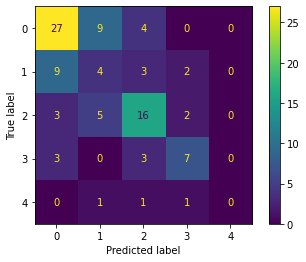

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_class_prediction_compi = np.argmax(test_predicition_compi, axis = 1)
cm = confusion_matrix(df_test.label, test_class_prediction_compi, labels = [0, 1, 2, 3, 4])

disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = [0, 1, 2, 3, 4]
  )

disp.plot()

In [143]:
test_class_prediction_compi

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 3, 2, 0, 1,
       0, 2, 0, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 2, 1, 0, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 3, 2, 2, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 2, 3,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 0, 1, 2, 2, 3, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 3, 0, 2, 2, 2, 3, 0, 0, 0, 2, 3, 0,

In [74]:
# prediction on train data
predicition_compi = pic_model.predict(compi_gen, steps = compi_gen.n/ BS, verbose= 1)

783/783 [==============================] - 6s 7ms/step


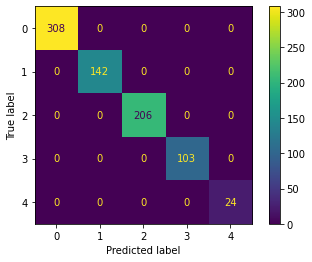

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_compi = np.argmax(predicition_compi, axis = 1)
cm = confusion_matrix(X_test.label, class_prediction_compi, labels = [0, 1, 2, 3, 4])

disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = [0, 1, 2, 3, 4]
  )

disp.plot()

In [87]:
cm

array([[308,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0],
       [  0,   0, 206,   0,   0],
       [  0,   0,   0, 103,   0],
       [  0,   0,   0,   0,  24]], dtype=int64)

In [82]:
class_prediction_compi

array([0, 2, 1, 0, 4, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 3, 2, 2, 4, 2, 0, 0, 0, 1, 3, 1, 2, 3, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 4, 0, 0, 1, 0, 2, 4, 0,
       2, 0, 0, 1, 2, 1, 2, 3, 3, 2, 0, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 3,
       0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 4, 1, 0, 0, 2, 3, 0, 0, 1, 3, 1, 2,
       0, 1, 3, 0, 2, 2, 2, 3, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0,
       2, 1, 1, 3, 0, 2, 0, 2, 1, 0, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 1,
       3, 0, 2, 0, 2, 3, 0, 2, 3, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 0, 3, 3, 0, 1, 0, 0, 2,
       1, 0, 4, 0, 2, 0, 0, 0, 0, 2, 0, 2, 4, 2, 1, 0, 1, 2, 0, 2, 2, 3,
       4, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 4, 3, 1, 0, 2,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 0, 3, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 3, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 4, 0, 0, 0, 4, 0, 2, 1, 3, 3,

# 시험세트 예측

In [164]:
# read the csv file
test = pd.read_csv(compi_root_path + "Test.csv")

# create test generator
test_generator = valid_aug.flow_from_dataframe(
    dataframe = test,
    directory = compi_root_path + "re",
    x_col = "filename",
    y_col = None,
    batch_size = 1,
    seed = seed,
    shuffle = False,
    class_mode = None,
    target_size = (image_size, image_size)
  )

# number of steps to consider 1 epoch
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

Found 0 validated image filenames.


C:\Users\ngkim\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1958 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [149]:
# number of steps to consider 1 epoch
DA_STEP_SIZE_TEST = da_test_generator.n//da_test_generator.batch_size

# make prediction and create dataframe out of it
da_pred = pic_model.predict(da_test_generator,steps=DA_STEP_SIZE_TEST,verbose=1)
da_df_submit = pd.DataFrame({"label":np.argmax(da_pred, axis= 1)})
da_df_submit["label"].value_counts()

531/531 [==============================] - ETA:  - 4s 7ms/step


0    169
2    135
1    111
3    110
4      6
Name: label, dtype: int64

In [ ]:
da_df_submit.to_csv("da.csv",index = False)

In [78]:
# make prediction and create dataframe out of it
pred = pic_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
df_submit = pd.DataFrame({"label":np.argmax(pred, axis= 1)})
df_submit["label"].value_counts()

1958/1958 [==============================] - 15s 8ms/step


0    776
2    516
1    350
3    257
4     59
Name: label, dtype: int64

# 최적의 가중치 및 출력 예측 파일 저장

In [79]:
pic_model.save_weights(name+"_BS"+str(batch_size)+"_EP"+str(train_epoch)+"_IS"+str(image_size)+"_LP"+str(LP)+".h5")

In [80]:
cd C:\\Users\\ngkim\\Downloads\\MDL\\TermProject_중간보고\\result

C:\Users\ngkim\Downloads\MDL\TermProject_중간보고\result


In [81]:
df_submit.to_csv(name+"_BS"+str(batch_size)+"_EP"+str(train_epoch)+"_IS"+str(image_size)+"_LP"+str(LP)+".csv",index = False)

**Suggestion to improve the score**
* Using right data augmentations
* Using different model architecture
* Ensembling and stacking
* Using pretrained model trained on xray images

**점수 향상을 위한 제안*
* 올바른 데이터 확대 사용
* 다른 모델 아키텍처 사용
* 조립 및 쌓기
* X선 영상에 대해 사전 훈련된 모델 사용

## CheXNet - DenseNet121 + Sigmoid
https://github.com/arnoweng/CheXNet/blob/master/model.py

In [163]:
# number of class
n_class = 5

# path to kaggle dataset
test_root_path = "C:\\Users\\ngkim\\Downloads\\224_data\\"

# list of folders
test_folder_list = os.listdir(test_root_path)
test_image_path_list = []
test_label_list = []

# for each folder, get the image path and labels
for folder in test_folder_list:
    for label in range(n_class):
        
        # get all the images path inside the current folder
        test_image_list = os.listdir(f"{test_root_path}{folder}/{label}")
        # add to the image path list
        test_image_path_list += [ f"{test_root_path}{folder}/{label}/"+ path for path in test_image_list]
        
        # add labels to the label list
        test_label_list += [label] * len(test_image_list)

# convert to dataframe
df_test = pd.DataFrame({"filepath" : test_image_path_list, "label": test_label_list})
df_test

,filepath,label
0,C:\Users\ngkim\Downloads\224_data\re/0/5a21060...,0
1,C:\Users\ngkim\Downloads\224_data\re/0/5a21060...,0
2,C:\Users\ngkim\Downloads\224_data\re/0/5a21112...,0
3,C:\Users\ngkim\Downloads\224_data\re/0/5a21112...,0
4,C:\Users\ngkim\Downloads\224_data\re/0/5a28d27...,0
...,...,...
95,C:\Users\ngkim\Downloads\224_data\re/3/5aa7726...,3
96,C:\Users\ngkim\Downloads\224_data\re/3/5aa78bc...,3
97,C:\Users\ngkim\Downloads\224_data\re/4/5a750c0...,4
98,C:\Users\ngkim\Downloads\224_data\re/4/5a750c0...,4
